## Reading the Data from the CSV file

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
data = pd.read_csv("Telco Customer Churn.csv")

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# EXPLORATORY DATA ANALYSIS (EDA)

In [4]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
data.shape

(7043, 21)

In [9]:
for i in data.columns:
    print(f"===={i}=====\n")
    print(data[i].value_counts())
    print("=======================\n")
    print("_______________________________")

====customerID=====

customerID
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: count, Length: 7043, dtype: int64

_______________________________
====gender=====

gender
Male      3555
Female    3488
Name: count, dtype: int64

_______________________________
====SeniorCitizen=====

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

_______________________________
====Partner=====

Partner
No     3641
Yes    3402
Name: count, dtype: int64

_______________________________
====Dependents=====

Dependents
No     4933
Yes    2110
Name: count, dtype: int64

_______________________________
====tenure=====

tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64

_______________________________
====PhoneService=====

PhoneService
Yes    6361
No      682


### **Ideally we should drop CustomerId because all the samples have distinct values and it wont help model to learn anything. But we can also reset the index for this column so that we directly get the customer Id who is probable to leave! So to keep it simple lets drop it.**

# Data Preprocessing

In [10]:
cid=data['customerID']
cid.head()

0    7590-VHVEG
1    5575-GNVDE
2    3668-QPYBK
3    7795-CFOCW
4    9237-HQITU
Name: customerID, dtype: object

In [11]:
data.drop(['customerID'],axis=1,inplace=True)

### **Here I have just replaced the value of No phone service and No internet service to No. As both mean the same**

In [12]:
data.replace({'No phone service':'No','No internet service':'No'},inplace=True)

In [13]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Dropping Unnecessary Columns

In [14]:
X=data.drop(['Churn'],axis=1)
y=data['Churn']

In [15]:
columns=[]
for i in X.columns:
    if len(X[i].unique()) < 5:
        columns.append(i)
columns

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [16]:
X=pd.get_dummies(X,columns=columns,drop_first=True)
X.head()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,...,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,False,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
1,34,56.95,1889.5,True,False,False,False,True,False,False,...,True,False,False,False,True,False,False,False,False,True
2,2,53.85,108.15,True,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,True
3,45,42.30,1840.75,True,False,False,False,False,False,False,...,True,True,False,False,True,False,False,False,False,False
4,2,70.70,151.65,False,False,False,False,True,False,True,...,False,False,False,False,False,False,True,False,True,False


In [17]:
X.drop(['TotalCharges'],axis=1,inplace=True)

In [18]:
from sklearn.preprocessing import StandardScaler
columns=['tenure','MonthlyCharges']
X_scaled=StandardScaler().fit_transform(X[columns])
X['tenure']=X_scaled[:,0]
X['MonthlyCharges']=X_scaled[:,1]
X.head()

,tenure,MonthlyCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,...,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-1.277445,-1.160323,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
1,0.066327,-0.259629,True,False,False,False,True,False,False,False,...,True,False,False,False,True,False,False,False,False,True
2,-1.236724,-0.362660,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,True
3,0.514251,-0.746535,True,False,False,False,False,False,False,False,...,True,True,False,False,True,False,False,False,False,False
4,-1.236724,0.197365,False,False,False,False,True,False,True,False,...,False,False,False,False,False,False,True,False,True,False


<Axes: >

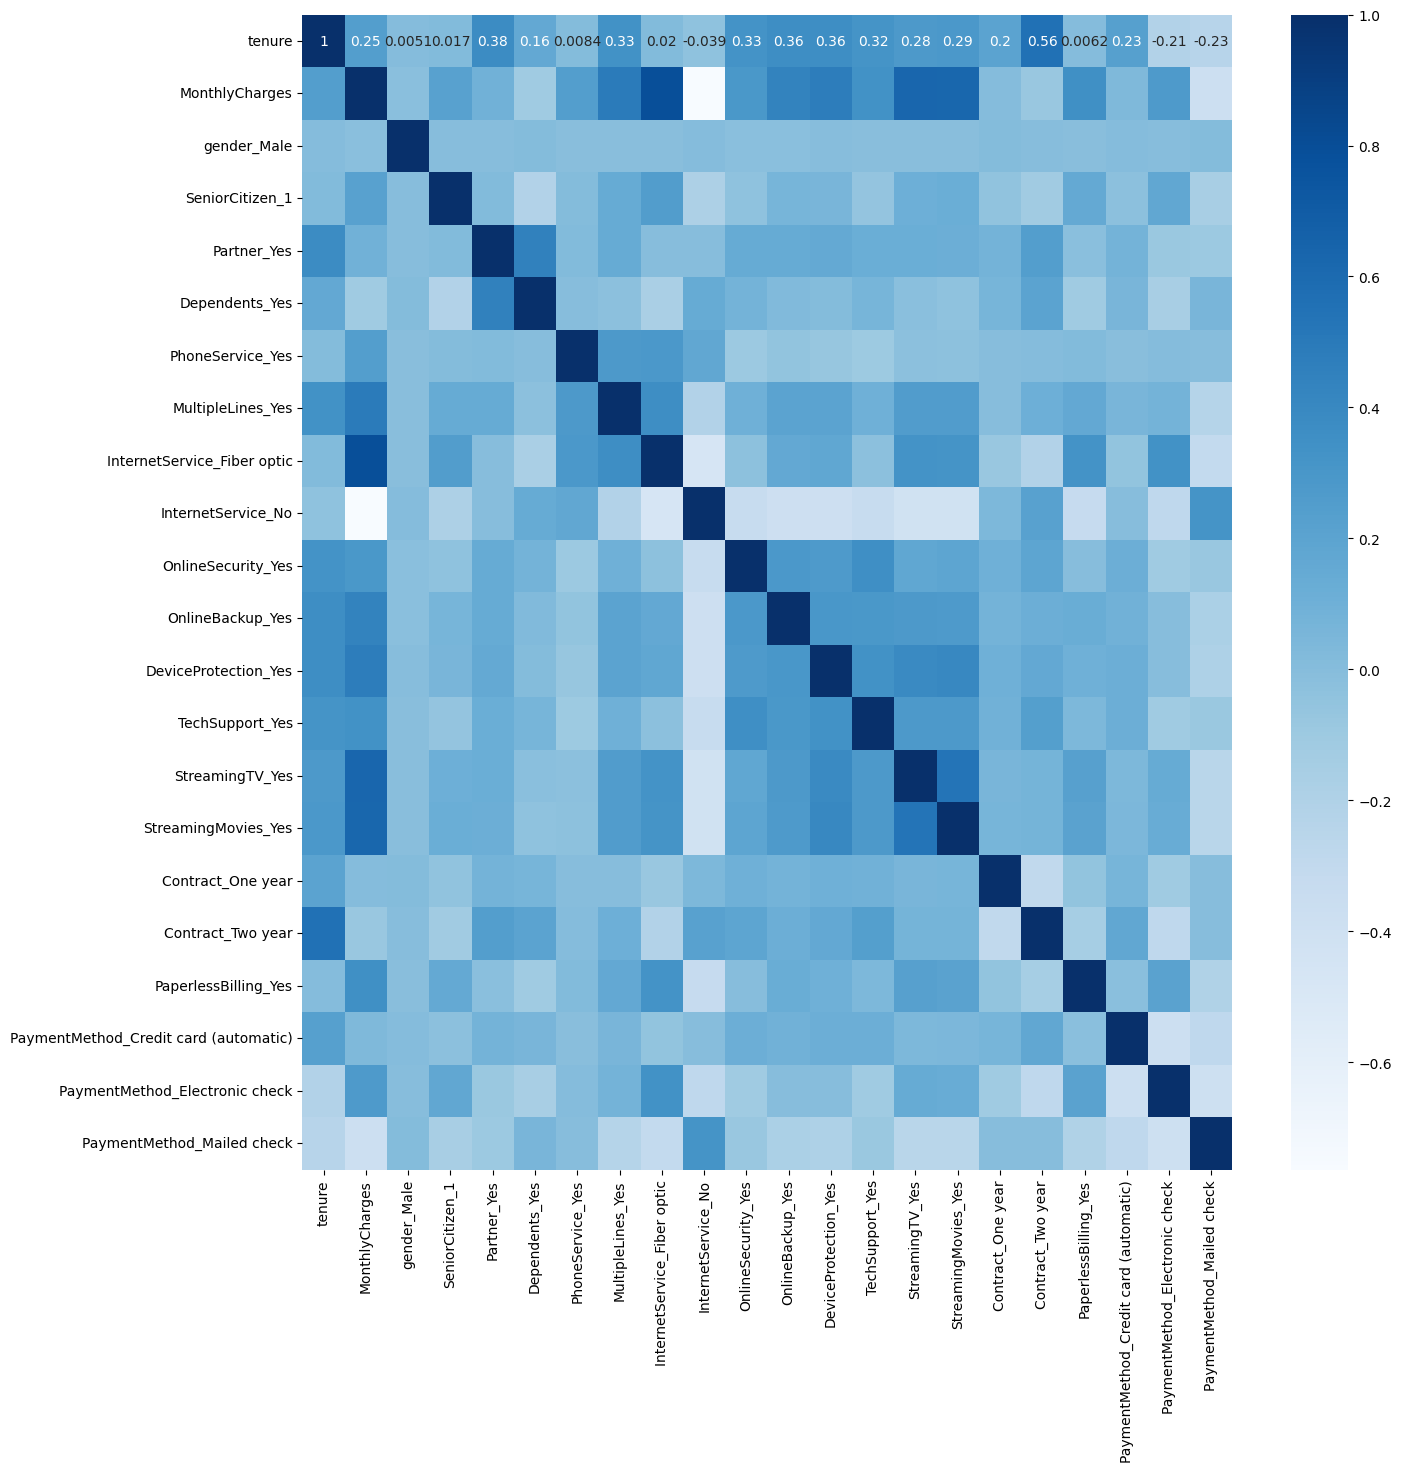

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,15))
sns.heatmap(X.corr(),annot=True,cmap='Blues')

**Observation:**
* Here we see a strong correlation between **InternetService_Fiber optic** and **MonthlyCharges** which is obvious as people have fiber optic would be having a higher monthly charges than people without fiber optic.
* A strong negative correlation is seen between **InternetService_No** and **MonthlyCharges**. The reason is intuitive.
* Strong positive correlation is also seen between **StreamingTV_Yes** , **StreamingMovies_Yes** with **MonthlyCharges**. The reason is intuitive.

In [20]:
y=pd.get_dummies(y,drop_first=True)
y

,Yes
0,False
1,False
2,True
3,False
4,True
...,...
7038,False
7039,False
7040,False
7041,True


<Axes: xlabel='Yes', ylabel='count'>

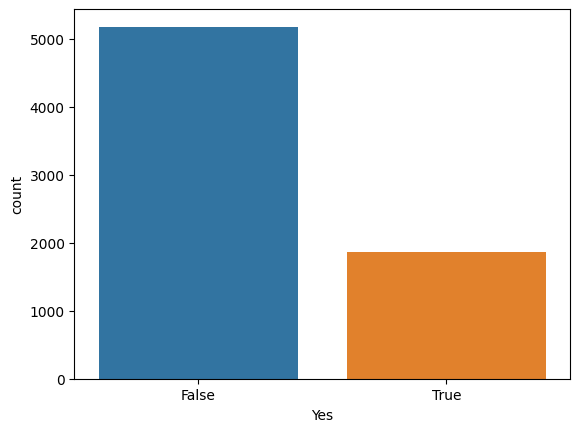

In [21]:
sns.countplot(data=y,x='Yes')

## **Highly Imbalanced Dataset. We can do RandomOversampling**

In [22]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversample.fit_resample(X, y)

<Axes: xlabel='Yes', ylabel='count'>

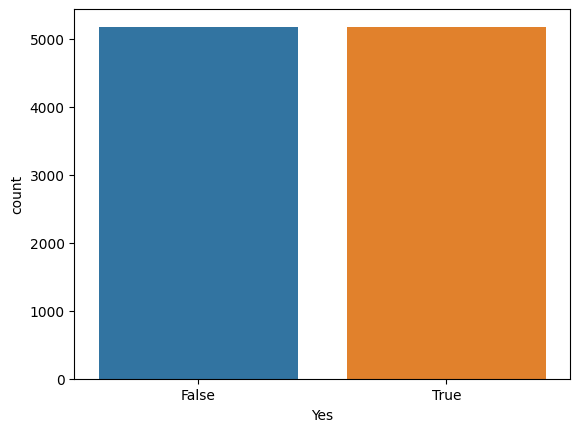

In [23]:
sns.countplot(data=y_over,x='Yes')

In [24]:
y_over=y_over['Yes']

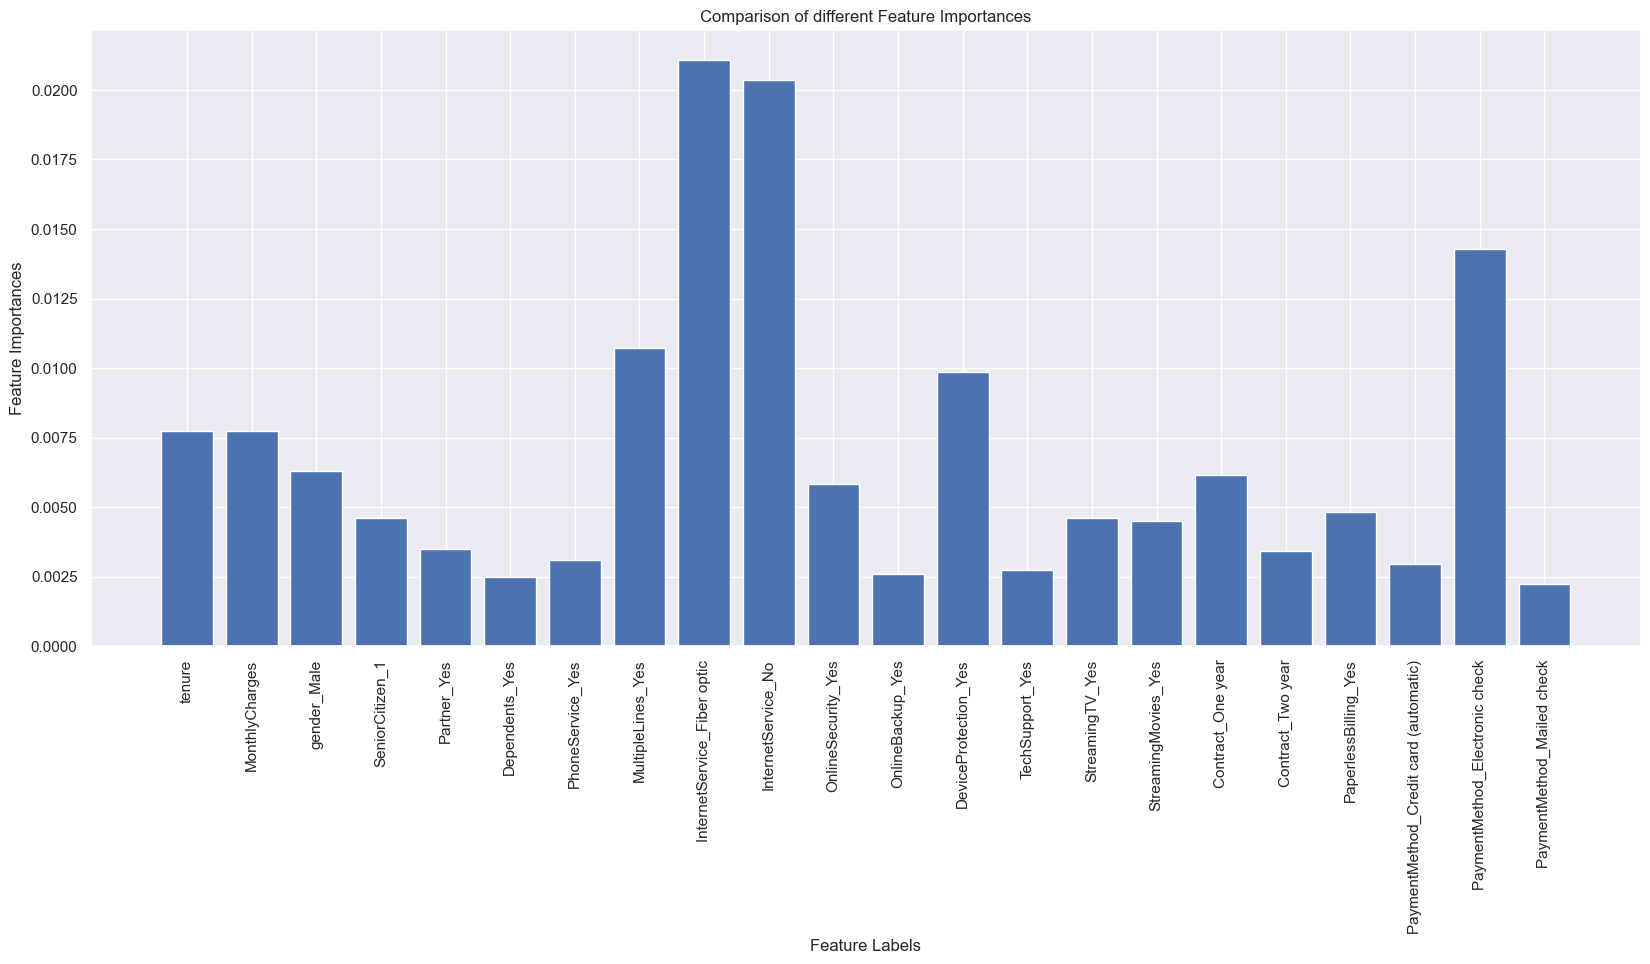

In [25]:
from sklearn.ensemble import ExtraTreesClassifier
sns.set()
extra_tree_forest = ExtraTreesClassifier(n_estimators = 5,
                                        criterion ='entropy', max_features = 2,random_state=42)
plt.figure(figsize=(20,8))
  
extra_tree_forest.fit(X_over, y_over)
  
feature_importance = extra_tree_forest.feature_importances_
  
feature_importance_normalized = np.std([tree.feature_importances_ for tree in 
                                        extra_tree_forest.estimators_],
                                        axis = 0)
plt.bar(X.columns, feature_importance_normalized)
plt.xlabel('Feature Labels')
plt.ylabel('Feature Importances')
plt.xticks(rotation=90)
plt.title('Comparison of different Feature Importances')
plt.show()

### Important Features<br>
* MonthlyCharges
* MultipleLines_Yes
* InternetService_Fiber optic
* InternetService_No
* PaymentMethod_Electronic check

# Model Building
## Here we need a higher recall for Class 1.<br>

**Reason:** We are required to predict those customers who will churn(Leave) in the near future. And having a higher recall for Class 1 would help us predict more accurately the churn.

RECALL : Percentage of actual Class 1 which were correctly classified
Recall = True Positives / (True Positives + False Negatives)
Higher recall suggests lower false negatives.

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_over,y_over,random_state=42)

## KNN 

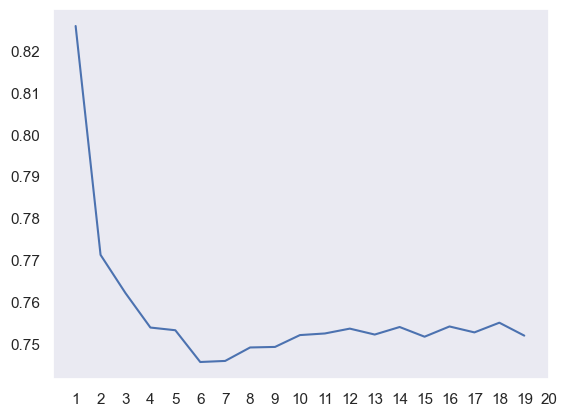

In [27]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
knn_scores=[]
for k in range(1,20):
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,X_train,y_train,cv=5)
    knn_scores.append(scores.mean())

x_ticks = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
x_labels = x_ticks

plt.plot([k for k in range(1,20)],knn_scores)
plt.xticks(ticks=x_ticks, labels=x_labels)
plt.grid()

              precision    recall  f1-score   support

       False       0.92      0.79      0.85      1298
        True       0.81      0.93      0.87      1289

    accuracy                           0.86      2587
   macro avg       0.87      0.86      0.86      2587
weighted avg       0.87      0.86      0.86      2587



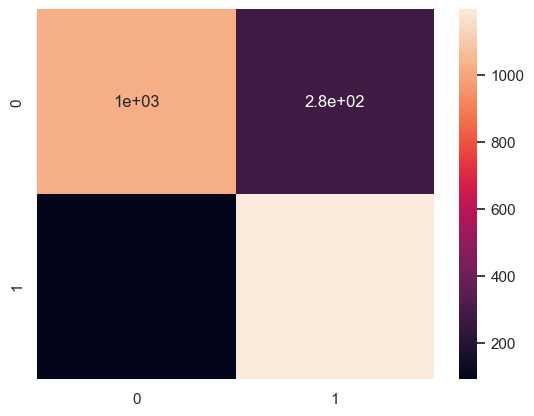

In [28]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
from sklearn.metrics import confusion_matrix
confusion_knn=confusion_matrix(y_test,knn.predict(X_test))
sns.heatmap(confusion_knn,annot=True)
from sklearn.metrics import classification_report
print(classification_report(y_test,knn.predict(X_test)))

## Support Vector Machine

              precision    recall  f1-score   support

       False       0.89      0.95      0.92      1298
        True       0.94      0.88      0.91      1289

    accuracy                           0.91      2587
   macro avg       0.92      0.91      0.91      2587
weighted avg       0.92      0.91      0.91      2587



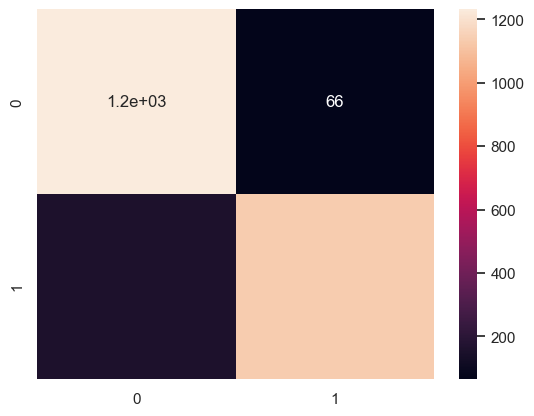

In [29]:
param_grid={'C':[0.001,0.01,0.1,1,10,100], 'gamma':[0.001,0.01,0.1,1,10,100]}
rcv=RandomizedSearchCV(SVC(),param_grid,cv=5)
rcv.fit(X_train,y_train)
y_pred_svc=rcv.predict(X_test)
confusion_svc=confusion_matrix(y_test,rcv.predict(X_test))
sns.heatmap(confusion_svc,annot=True)
print(classification_report(y_test,y_pred_svc))

SVM predicts fine but we need high recall for CLASS 1.

## Logistic Regression

              precision    recall  f1-score   support

       False       0.79      0.76      0.77      1298
        True       0.76      0.80      0.78      1289

    accuracy                           0.78      2587
   macro avg       0.78      0.78      0.78      2587
weighted avg       0.78      0.78      0.78      2587



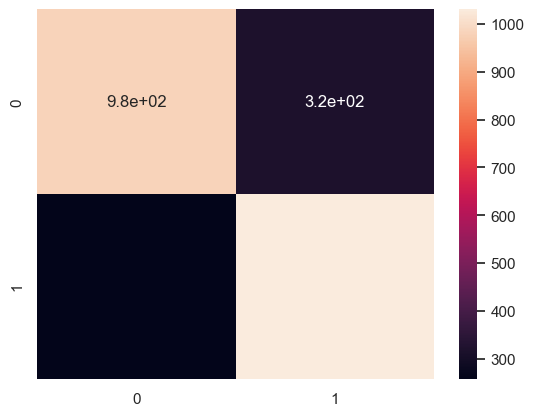

In [30]:
param_grid={'C':[0.001,0.01,0.1,1,10,100], 'max_iter':[200,300,400,500,700]}
log=RandomizedSearchCV(LogisticRegression(),param_grid,cv=5)
log.fit(X_train,y_train)
y_pred_log=log.predict(X_test)
confusion_log=confusion_matrix(y_test,log.predict(X_test))
sns.heatmap(confusion_log,annot=True)
print(classification_report(y_test,y_pred_log))

## Random Forest Classifier

              precision    recall  f1-score   support

       False       0.93      0.84      0.88      1298
        True       0.85      0.94      0.89      1289

    accuracy                           0.89      2587
   macro avg       0.89      0.89      0.89      2587
weighted avg       0.89      0.89      0.89      2587



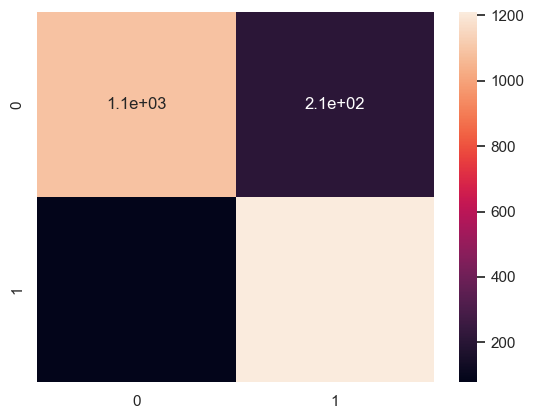

In [31]:
param_grid = {
'n_estimators': [50, 75,100, 150, 200,300],
}
rcv=RandomizedSearchCV(RandomForestClassifier(random_state=42),param_grid,cv=5)
rcv.fit(X_train,y_train)
y_pred_rcv=rcv.predict(X_test)
confusion_rcv=confusion_matrix(y_test,rcv.predict(X_test))
sns.heatmap(confusion_rcv,annot=True)
print(classification_report(y_test,y_pred_rcv))


In [32]:
rcv.best_params_

{'n_estimators': 100}

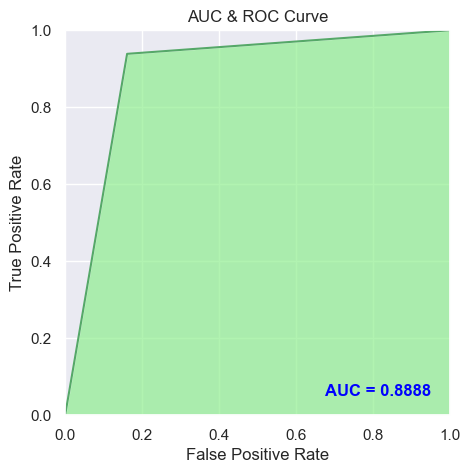

In [33]:
from sklearn import metrics
auc = metrics.roc_auc_score(y_test, y_pred_rcv)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, y_pred_rcv)

plt.figure(figsize=(8, 5), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

Class 1 recall is HIGH! More favourable model

              precision    recall  f1-score   support

       False       0.84      0.76      0.80      1298
        True       0.78      0.85      0.82      1289

    accuracy                           0.81      2587
   macro avg       0.81      0.81      0.81      2587
weighted avg       0.81      0.81      0.81      2587



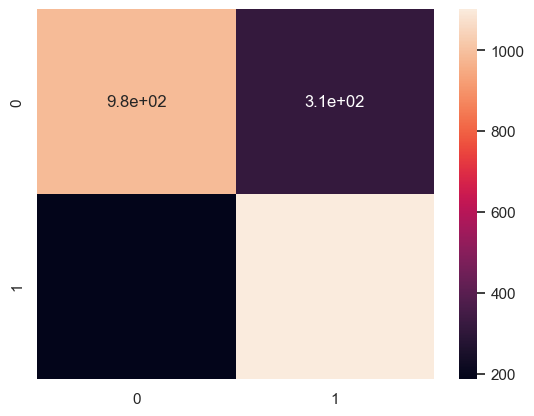

In [34]:
from sklearn.ensemble import GradientBoostingClassifier
param_grid = {
    'learning_rate' : [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1],
    'n_estimators': [50, 75,100, 150, 200,300],
}

gbc=RandomizedSearchCV(GradientBoostingClassifier(random_state=42),param_grid,cv=5)
gbc.fit(X_train,y_train)
y_pred_gbc=gbc.predict(X_test)
confusion_gbc=confusion_matrix(y_test,y_pred_gbc)
sns.heatmap(confusion_gbc,annot=True)
print(classification_report(y_test,y_pred_gbc))


In [35]:
model=RandomForestClassifier(n_estimators=100,random_state=42)
model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

              precision    recall  f1-score   support

       False       0.93      0.84      0.88      1298
        True       0.85      0.94      0.89      1289

    accuracy                           0.89      2587
   macro avg       0.89      0.89      0.89      2587
weighted avg       0.89      0.89      0.89      2587



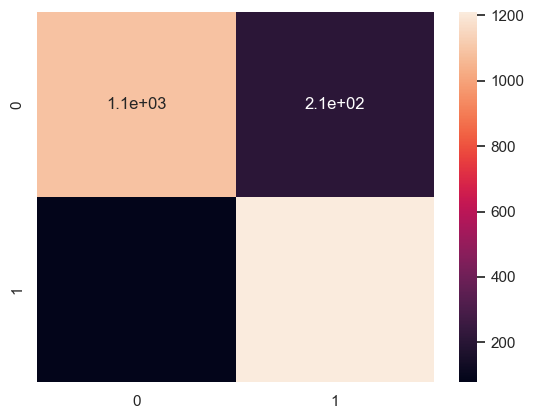

In [36]:
y_pred=model.predict(X_test)
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
print(classification_report(y_test,y_pred))


## Conclusion

Best Model : Random Forest Classifier